In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


%matplotlib inline
sns.set()

In [3]:
# Definir path
#%cd C:\Users\carol\OneDrive - Universidad de los Andes\CPH\MIIA\INTERSEMESTRAL\MODELOS AVANZADOS 1\Semana1\Proyecto
df= pd.read_csv('./Multitimeline.csv')
df.head()

,Semana,Electrónica: (Colombia),Jamming Festival: (Colombia),Rock al Parque: (Colombia),Festival Estéreo Picnic: (Colombia)
0,2015-06-21,6,<1,16,<1
1,2015-06-28,7,<1,8,<1
2,2015-07-05,6,<1,6,<1
3,2015-07-12,7,<1,10,<1
4,2015-07-19,6,<1,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 5 columns):
Semana                                 261 non-null object
Electrónica: (Colombia)                261 non-null int64
Jamming Festival: (Colombia)           261 non-null object
Rock al Parque: (Colombia)             261 non-null object
Festival Estéreo Picnic: (Colombia)    261 non-null object
dtypes: int64(1), object(4)
memory usage: 10.3+ KB


In [5]:
df.columns = ['week', 'Electronica', 'Jamming', 'Rock', 'Estereo']
df.head()

,week,Electronica,Jamming,Rock,Estereo
0,2015-06-21,6,<1,16,<1
1,2015-06-28,7,<1,8,<1
2,2015-07-05,6,<1,6,<1
3,2015-07-12,7,<1,10,<1
4,2015-07-19,6,<1,8,1


In [6]:
df.week = pd.to_datetime(df.week)
df.set_index('week', inplace=True)

df.head()

,Electronica,Jamming,Rock,Estereo
week,,,,
2015-06-21,6,<1,16,<1
2015-06-28,7,<1,8,<1
2015-07-05,6,<1,6,<1
2015-07-12,7,<1,10,<1
2015-07-19,6,<1,8,1


In [7]:
df=df.replace("<1",0)
df.head()

,Electronica,Jamming,Rock,Estereo
week,,,,
2015-06-21,6,0,16,0
2015-06-28,7,0,8,0
2015-07-05,6,0,6,0
2015-07-12,7,0,10,0
2015-07-19,6,0,8,1


In [8]:
df['Jamming']=df['Jamming'].astype(str).astype(int)
df['Rock']=df['Rock'].astype(str).astype(int)
df['Estereo']=df['Estereo'].astype(str).astype(int)
df.dtypes

Electronica    int64
Jamming        int32
Rock           int32
Estereo        int32
dtype: object

Text(0.5, 0, 'Year')

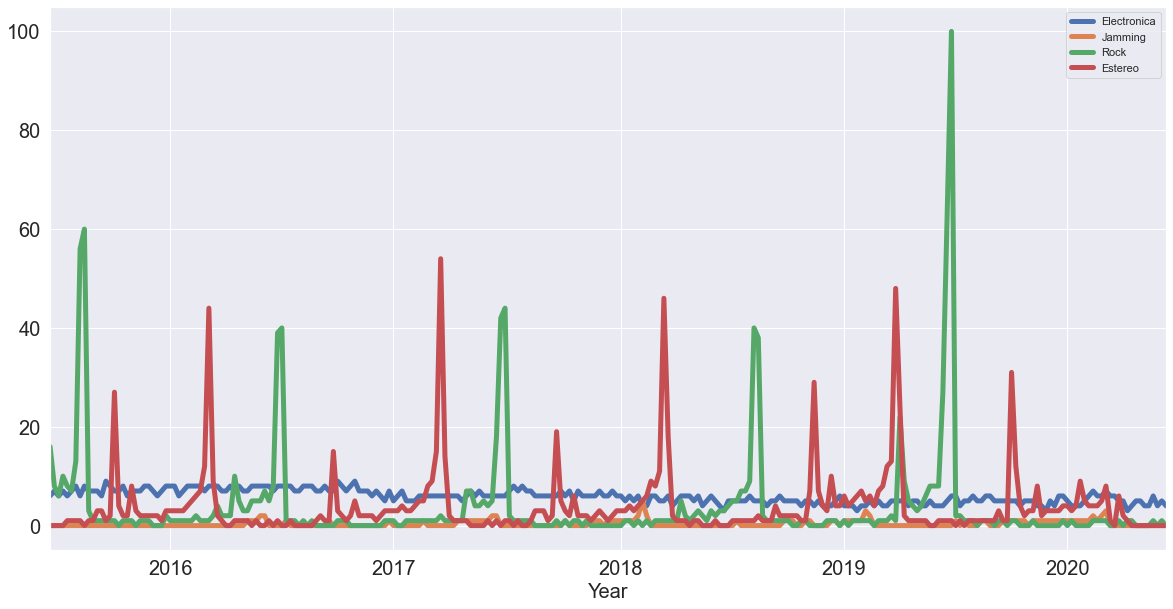

In [9]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

A simple vista se observa estacionalidad en los festivales de Rock al Parque y Estereo Picnic. Jamming se considera un festival de nicho. Por otro lado, las búsquedades del género Electrónica son constantes en el tiempo. 

### Correlación

In [10]:
df.corr()

,Electronica,Jamming,Rock,Estereo
Electronica,1.000000,-0.167242,0.050712,-0.070553
Jamming,-0.167242,1.000000,-0.106616,-0.017262
Rock,0.050712,-0.106616,1.000000,-0.093757
Estereo,-0.070553,-0.017262,-0.093757,1.000000


Al gráficar las series y encontrar sus correlaciones, no se evidencia un correlación entre los diferentes festivales de música y el género electrónica. 

## Tendencia

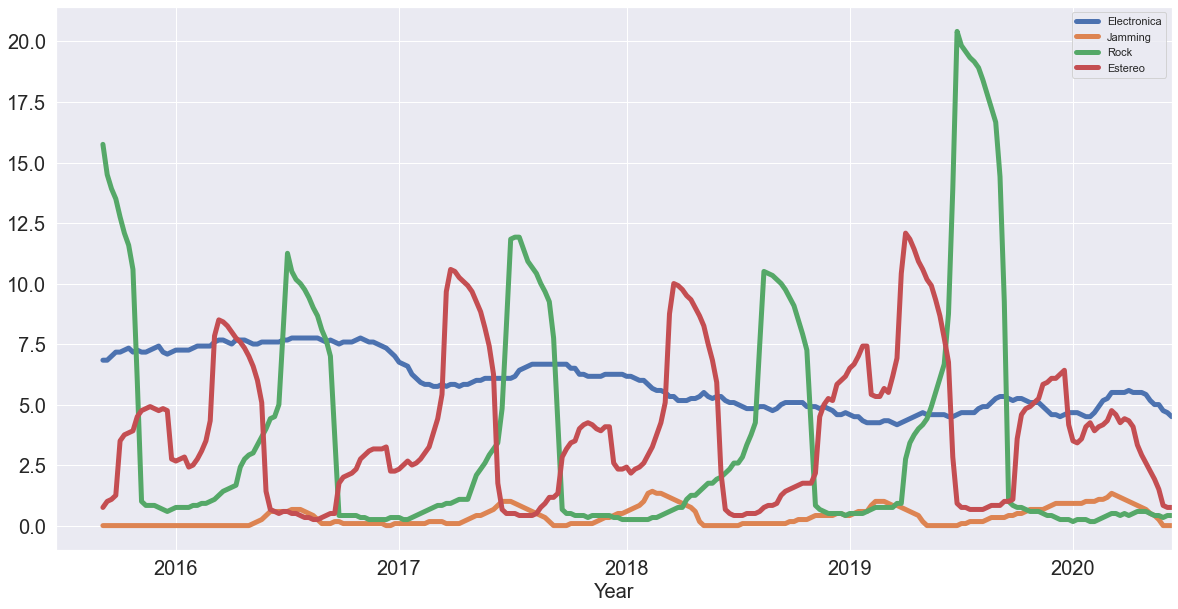

In [11]:
df[['Electronica', 'Jamming', 'Rock', 'Estereo']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

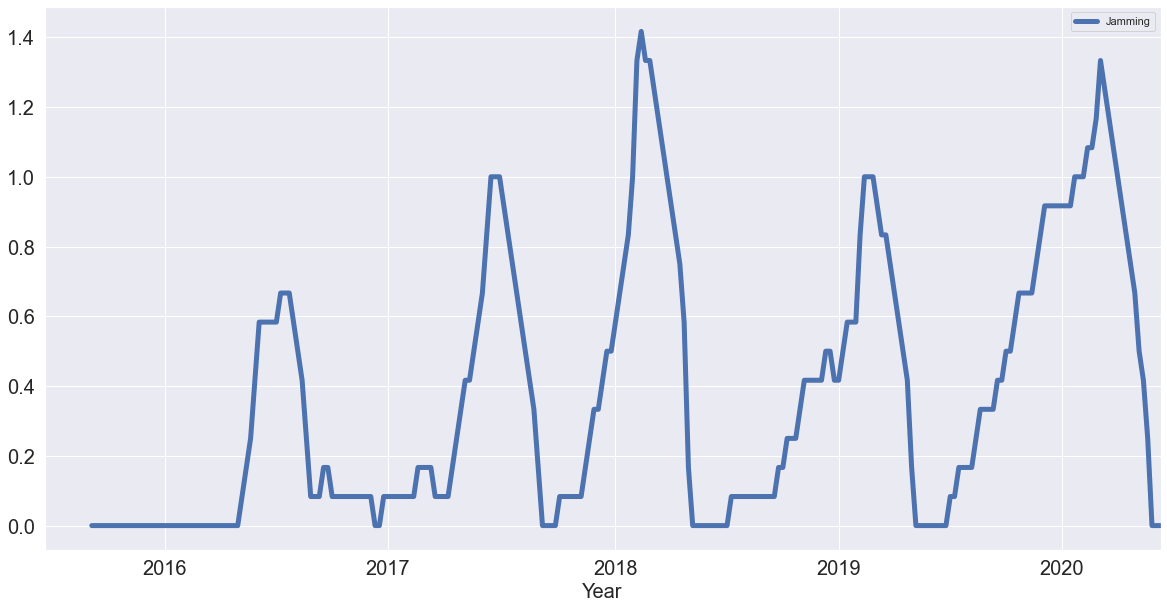

In [12]:
Ja  =  df [[ 'Jamming' ]] 
Ja.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

No se evidencia ninguna tendencia en los tres festivales. Sin embargo, Electrónica tiene una tendencia a la baja a lo largo del tiempo. 

## Estacionalidad 

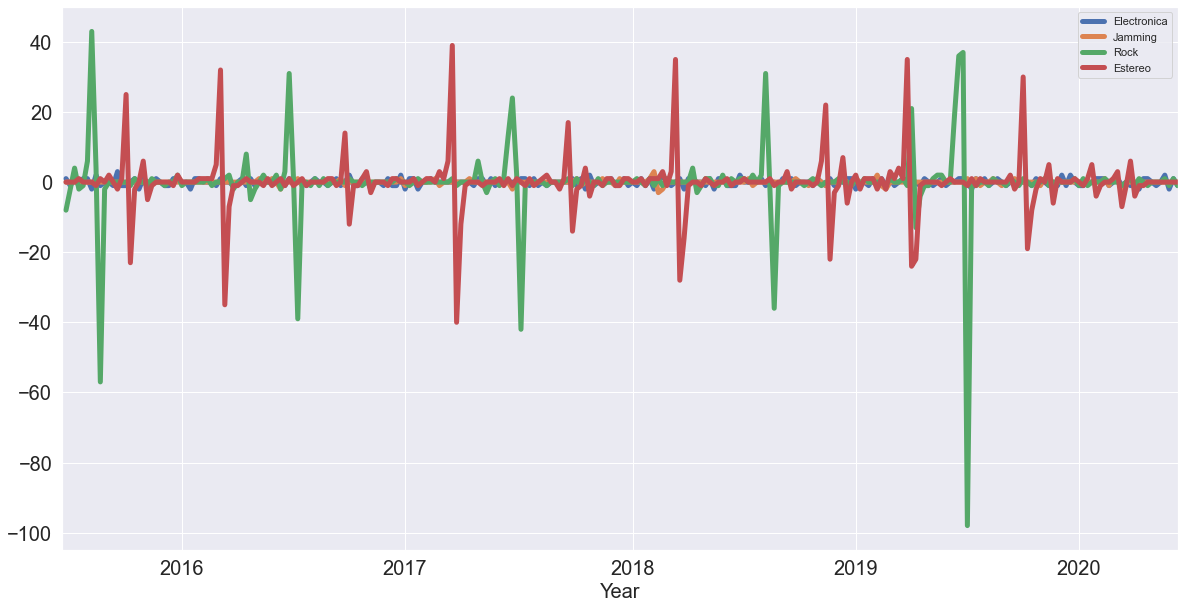

In [13]:
df[['Electronica', 'Jamming', 'Rock', 'Estereo']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

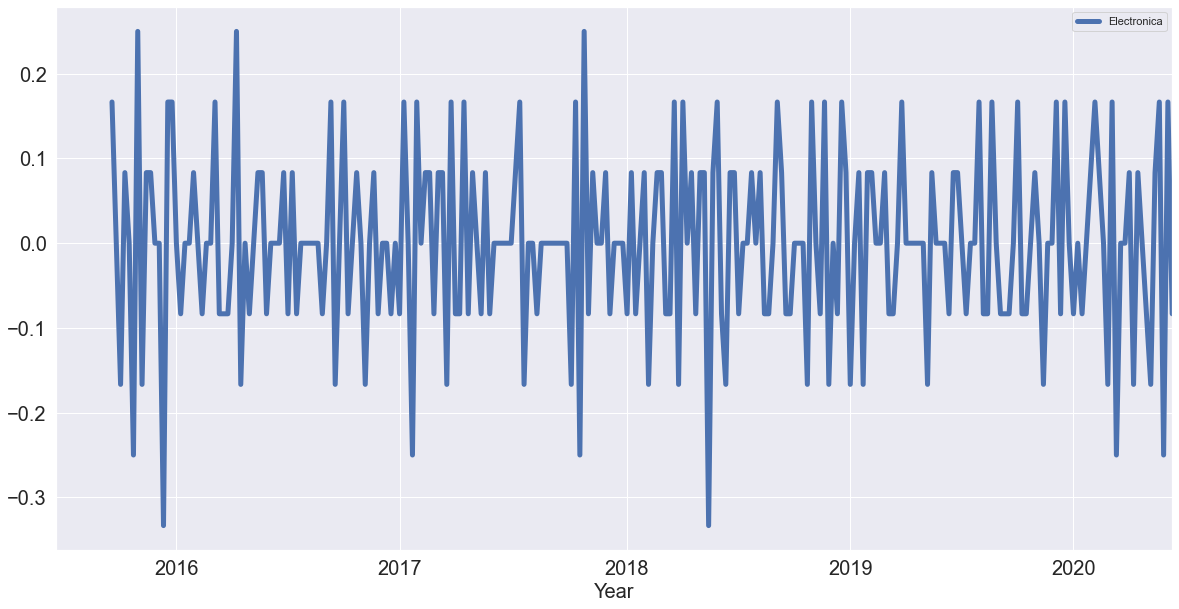

In [14]:
df[['Electronica']].diff().diff().rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Los tres festivales tienen una estacionalidad anual en diferentes momentos del año. Por el contrario, al realizar dos diferencias no se observa una estacionalida marcada.  

### Dickey Fuller Test

In [15]:
columns=df.columns

for i in columns:

    result = adfuller(df[i])
    print('La serie', i)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

La serie Electronica
ADF Statistic: -1.572335
p-value: 0.497474
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
La serie Jamming
ADF Statistic: -5.754653
p-value: 0.000001
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
La serie Rock
ADF Statistic: -9.268091
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
La serie Estereo
ADF Statistic: -10.248246
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


Sin realizar diferencias, se observa que las series de los festivales Jamming, Rock y Estereo Picnic, rechazan la hipotesis nula, es decir son estacionarias. Sin embargo, la serie electrónica acepta la hipotesis nula. Por lo tanto, se necesita aplicar diferencias para convertirla en estacionaria.  

### Con una diferencia

In [16]:
columns=df.columns

for i in columns:

    result = adfuller(df[i].diff().iloc[1:])
    print('La serie', i)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

La serie Electronica
ADF Statistic: -10.475407
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
La serie Jamming
ADF Statistic: -11.958611
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
La serie Rock
ADF Statistic: -8.383327
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
La serie Estereo
ADF Statistic: -8.551901
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


Aplicando diferencias de primer orden, se observa que las cuatro series rechazan la hipotesis nula del Test de Dickey Fuller, es decir son estacionarias. 

### Correlación de diferencias primer orden

In [17]:
df.diff().corr()

,Electronica,Jamming,Rock,Estereo
Electronica,1.000000,0.006999,0.014184,-0.046459
Jamming,0.006999,1.000000,-0.115558,-0.019942
Rock,0.014184,-0.115558,1.000000,-0.001360
Estereo,-0.046459,-0.019942,-0.001360,1.000000


Aplicando diferencias de primer orden, no se observa correlación entre ningunos de los festivales, debido a que cada uno se realiza en diferentes momentos del año. Además, no se observa una correlación entre el género músical de la Electrónica y estos festivales. 

### Autocorrelación 

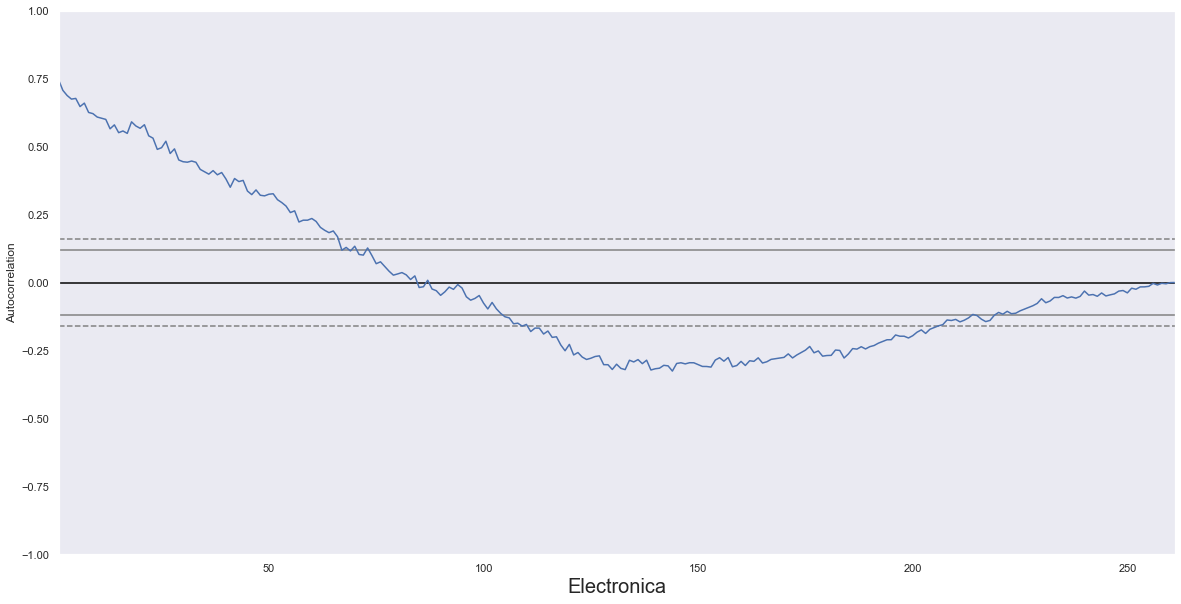

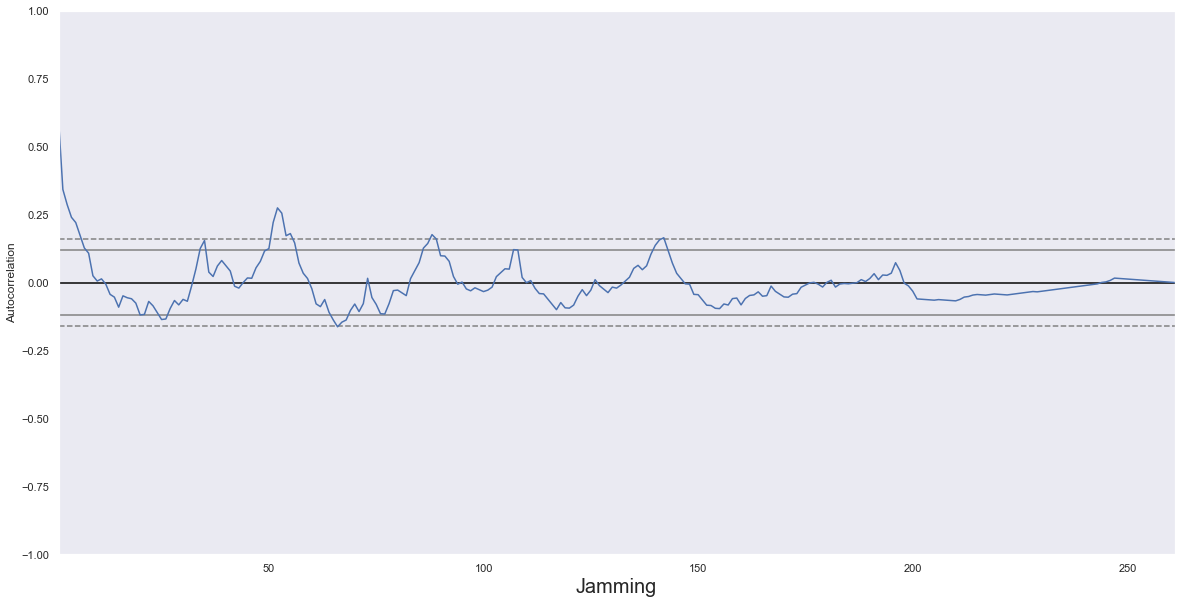

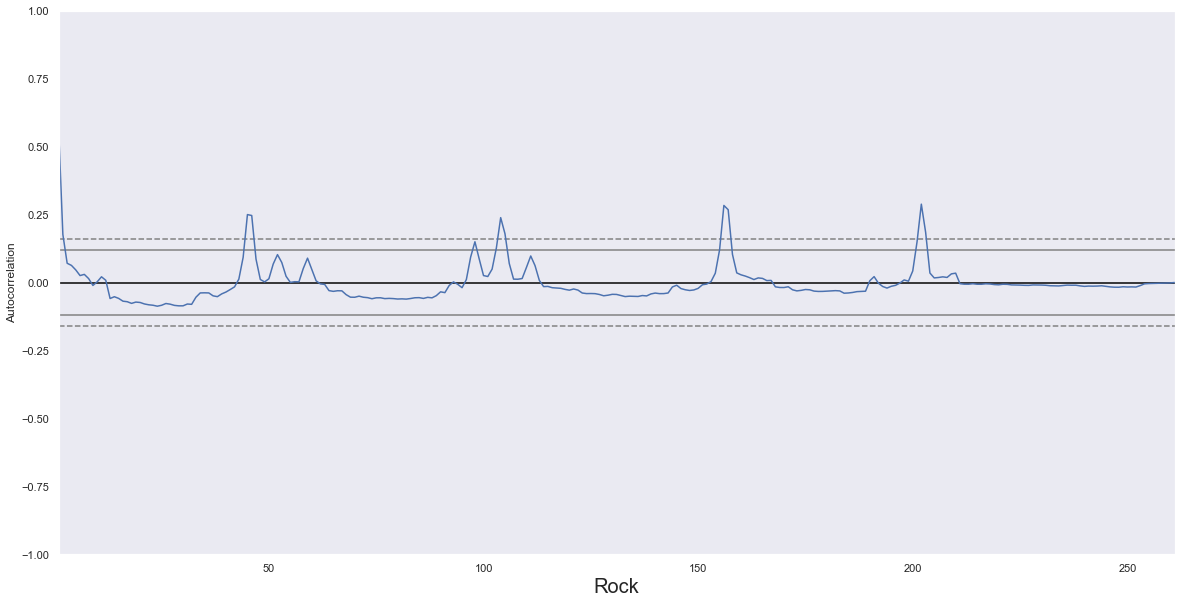

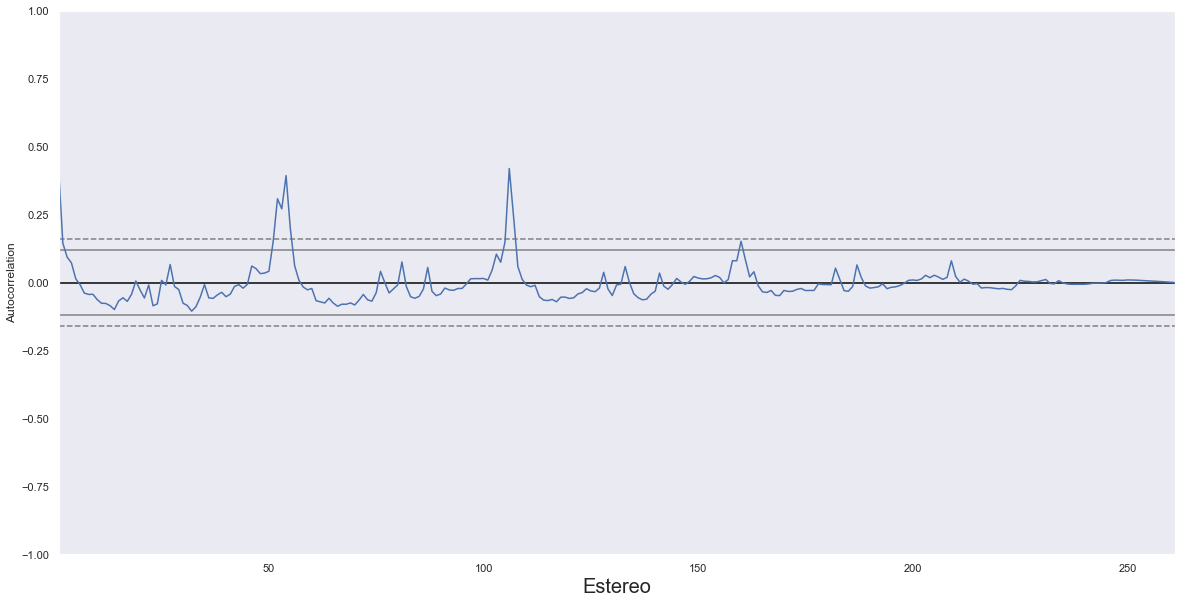

In [18]:
columns=df.columns

for i in columns:
   
    plt.figure(figsize=(20,10))
    pd.plotting.autocorrelation_plot(df[i]);
    plt.xlabel(i, fontsize=20);

A partir de las autocorrelaciones se puede concluir que los tres festivales tienen estacionalidades cada 50 semanas. Además, se observan picos en Jamming y Estéreo Picnic antes de que ocurra el festival, esto se debe a la publicación de la cartelera de artistas. Por otro lado, electrónica como se ha mencionado, al ser un género músical y tener búsquedas estables en el año no se ve una estacionalidad marcada. 

## ACF/ PACF PLOT

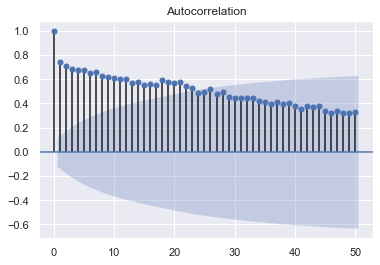

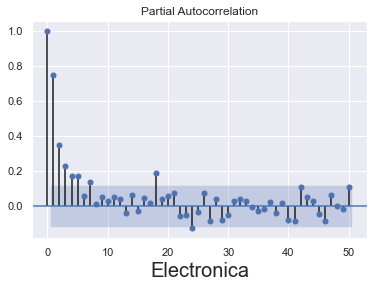

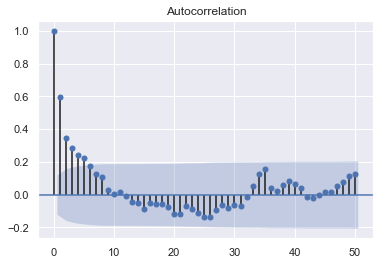

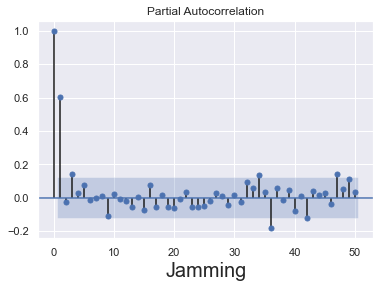

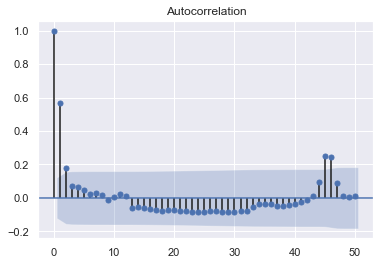

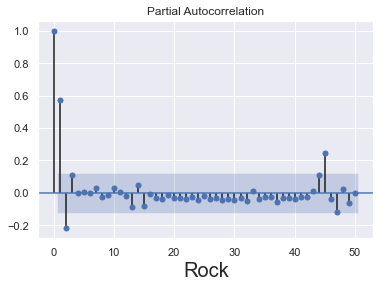

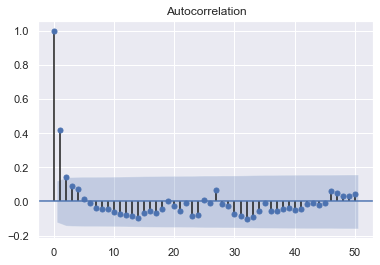

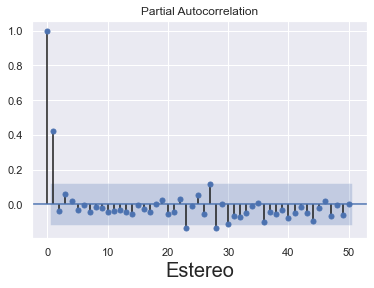

In [19]:
columns=df.columns

for c in columns:
    plot_acf(df[c], lags=50 );
    plot_pacf(df[c], lags=50);
    plt.xlabel(c, fontsize=20);
    
    

* Electronica AR orden 1 
* Jamming MA orden 1 
* Rock MA orden 1
* Estereo MA orden 1

C:\Users\david\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\david\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\david\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\david\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

C:\Users\david\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\david\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\david\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\david\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

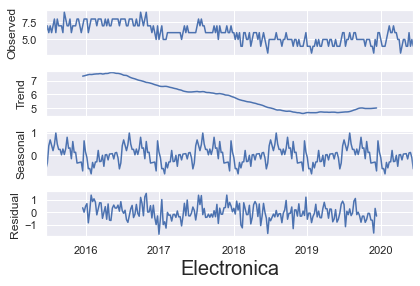

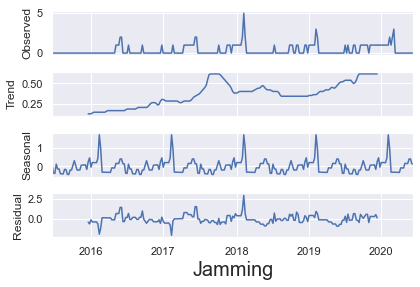

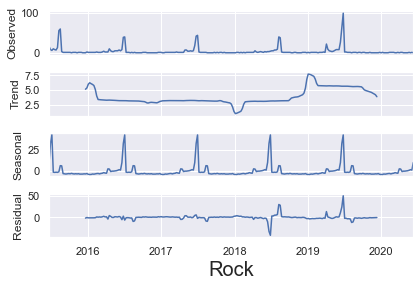

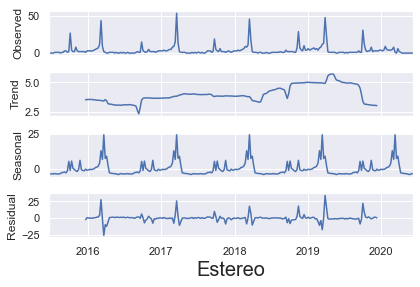

In [20]:
columns=df.columns

for c in columns:
    result = seasonal_decompose(df[c], model='additive')
    fig = result.plot()
    plt.xlabel(c, fontsize=20);
    #plot_mpl(fig)

## ARIMA

Basados en los análisis y las gráficas anteriores. Los parámetros del modelo ARIMA se dejan en un rango de: 
* p = (0,5) Los ACF Y PACF plot, los rezagos más importantes entre 1 y 5 
* d = (0,2) Al realizar los gráficos de diferencias y los test de DF la máxima diferencia es 2 para que sean estacionarias
* q = (0,5) Los ACF Y PACF plot, los rezagos más importantes entre 1 y 5

In [21]:
c= df.columns
modelos = list()
test_l= list()
output_l=list()

for i in c: 

    x = df[i].values
    size = int(len(x) * 0.7)
    train, test = x[0:size], x[size:len(x)]
    len(test)

    p_list = range(5)
    d_list = range(2)
    q_list = range(5)
    max_error=999999
    p_best=0
    d_best=0
    q_best=0


    for p in p_list:
        for d in d_list:
            for q in q_list:

                history = [x for x in train]
                predictions = list()
                print('p:',p,'d:',d,'q:',q)
                try:
                    for t in range(len(test)):
                        model = ARIMA(history, order=(p,d,q))
                        model_fit = model.fit(disp=0)
                        output = model_fit.forecast()
                        yhat = output[0]
                        predictions.append(yhat)
                        obs = test[t]
                        history.append(obs)
                        #print('predicted=%f, expected=%f' % (yhat, obs))

                    error = mean_squared_error(test, predictions)**0.5
                    print('Test MSE: %.3f' % error)


                    if error < max_error:
                        max_error=error
                        p_best=p
                        d_best=d
                        q_best=q
                        #print('p:',p_best,'d:',d_best,'q:',q_best)
                except Exception as e:
                    print(e)
    print('Serie:', i)                
    print('Best MSE: %.3f' % max_error)
    print('p_best:',p_best,'d_best:',d_best,'q_best:',q_best)
    modelos.append([i,model_fit, test, predictions])


p: 0 d: 0 q: 0
Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'
p: 0 d: 0 q: 1
Test MSE: 1.211
p: 0 d: 0 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 1.053
p: 0 d: 0 q: 3
Test MSE: 1.025
p: 0 d: 0 q: 4
Test MSE: 0.980
p: 0 d: 1 q: 0
Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'
p: 0 d: 1 q: 1
Test MSE: 0.850
p: 0 d: 1 q: 2
Test MSE: 0.839
p: 0 d: 1 q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 0 d: 1 q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 1 d: 0 q: 0
Test MSE: 0.903
p: 1 d: 0 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


Test MSE: 0.844
p: 1 d: 0 q: 2
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 1 d: 0 q: 3
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 1 d: 0 q: 4
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 1 d: 1 q: 0
Test MSE: 0.880
p: 1 d: 1 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.838
p: 1 d: 1 q: 2
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 1 d: 1 q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 1 d: 1 q: 4
Test MSE: 0.851
p: 2 d: 0 q: 0
Test MSE: 0.862
p: 2 d: 0 q: 1
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 2 d: 0 q: 2
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 2 d: 0 q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2 d: 0 q: 4
The computed initial AR coefficien

C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3 d: 0 q: 0
Test MSE: 0.878
p: 3 d: 0 q: 1
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 3 d: 0 q: 2
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.p

The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3 d: 0 q: 4
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 3 d: 1 q: 0
Test MSE: 0.879
p: 3 d: 1 q: 1
Test MSE: 0.844
p: 3 d: 1 q: 2
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3 d: 1 q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3 d: 1 q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4 d: 0 q: 0
Test MSE: 0.867
p: 4 d: 0 q: 1
The computed initial AR coefficie

C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4 d: 1 q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
Serie: Electronica
Best MSE: 0.838
p_best: 1 d_best: 1 q_best: 1
p: 0 d: 0 q: 0
Cannot cast ufunc subtract output from dtype('float64') to dtype('int32') with casting rule 'same_kind'
p: 0 d: 0 q: 1
Test MSE: 0.620
p: 0 d: 0 q: 2
Test MSE: 0.617
p: 0 d: 0 q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 0 d: 0 q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 0 d: 1 q: 0
Cannot cast ufunc subtract output from dtype('float64'

C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.620
p: 0 d: 1 q: 2
Test MSE: 0.599
p: 0 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

Test MSE: 0.615
p: 0 d: 1 q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 1 d: 0 q: 0


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.593
p: 1 d: 0 q: 1
Test MSE: 0.601
p: 1 d: 0 q: 2
Test MSE: 0.589
p: 1 d: 0 q: 3
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 1 d: 0 q: 4
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 1 d: 1 q: 0
Test MSE: 0.641
p: 1 d: 1 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.588
p: 1 d: 1 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 0.596
p: 1 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\l

Test MSE: 0.629
p: 1 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


SVD did not converge
p: 2 d: 0 q: 0
Test MSE: 0.598
p: 2 d: 0 q: 1
Test MSE: 0.597
p: 2 d: 0 q: 2
Test MSE: 0.591
p: 2 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

Test MSE: 0.599
p: 2 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\U

The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 2 d: 1 q: 0
Test MSE: 0.620
p: 2 d: 1 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 0.593
p: 2 d: 1 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


SVD did not converge
p: 2 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

SVD did not converge
p: 2 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\

SVD did not converge
p: 3 d: 0 q: 0
Test MSE: 0.592
p: 3 d: 0 q: 1
Test MSE: 0.592
p: 3 d: 0 q: 2
Test MSE: 0.594
p: 3 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

Test MSE: 0.603
p: 3 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\l

Test MSE: 0.605
p: 3 d: 1 q: 0
Test MSE: 0.619
p: 3 d: 1 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.589
p: 3 d: 1 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\l

SVD did not converge
p: 3 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

SVD did not converge
p: 4 d: 0 q: 0
Test MSE: 0.594
p: 4 d: 0 q: 1
Test MSE: 0.593
p: 4 d: 0 q: 2
Test MSE: 0.596
p: 4 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

SVD did not converge
p: 4 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

SVD did not converge
p: 4 d: 1 q: 0
Test MSE: 0.609
p: 4 d: 1 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Test MSE: 0.592
p: 4 d: 1 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaco

Test MSE: 0.597
p: 4 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

SVD did not converge
p: 4 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

SVD did not converge
Serie: Jamming
Best MSE: 0.588
p_best: 1 d_best: 1 q_best: 1
p: 0 d: 0 q: 0
Cannot cast ufunc subtract output from dtype('float64') to dtype('int32') with casting rule 'same_kind'
p: 0 d: 0 q: 1
Test MSE: 12.418
p: 0 d: 0 q: 2
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 0 d: 0 q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 0 d: 0 q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 0 d: 1 q: 0
Cannot cast ufunc subtract output from dtype('float64') to dtype('int32') with casting rule 'same_kind'
p: 0 d: 1 q: 1
Test MSE: 14.295
p: 0 d: 1 q: 2
Test MSE: 14.505
p: 0 d: 1 q: 3
Test MSE: 13.827
p: 0 d: 1 q: 4
Test MSE: 14

C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 13.871
p: 1 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Test MSE: 13.994
p: 1 d: 1 q: 0
Test MSE: 13.504
p: 1 d: 1 q: 1
Test MSE: 13.621
p: 1 d: 1 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 13.413
p: 1 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 14.009
p: 1 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 14.007
p: 2 d: 0 q: 0
Test MSE: 13.099
p: 2 d: 0 q: 1
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2 d: 0 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 13.889
p: 2 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', H

The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+n

The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2 d: 1 q: 0
Test MSE: 14.188
p: 2 d: 1 q: 1
Test MSE: 14.300
p: 2 d: 1 q: 2
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

SVD did not converge
p: 2 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

SVD did not converge
p: 3 d: 0 q: 0
Test MSE: 13.499
p: 3 d: 0 q: 1
Test MSE: 13.825
p: 3 d: 0 q: 2
Test MSE: 13.967
p: 3 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

SVD did not converge
p: 3 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 3 d: 1 q: 0
Test MSE: 14.213
p: 3 d: 1 q: 1
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 3 d: 1 q: 2
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 3 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\l

The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 3 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4 d: 0 q: 0
Test MSE: 13.659
p: 4 d: 0 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 13.951
p: 4 d: 0 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning

Test MSE: 13.680
p: 4 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retval

SVD did not converge
p: 4 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

SVD did not converge
p: 4 d: 1 q: 0
Test MSE: 14.439
p: 4 d: 1 q: 1
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4 d: 1 q: 2
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4 d: 1 q: 3
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 4 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


SVD did not converge
Serie: Rock
Best MSE: 12.418
p_best: 0 d_best: 0 q_best: 1
p: 0 d: 0 q: 0
Cannot cast ufunc subtract output from dtype('float64') to dtype('int32') with casting rule 'same_kind'
p: 0 d: 0 q: 1
Test MSE: 6.234
p: 0 d: 0 q: 2
Test MSE: 6.187
p: 0 d: 0 q: 3
Test MSE: 6.192
p: 0 d: 0 q: 4
Test MSE: 6.174
p: 0 d: 1 q: 0
Cannot cast ufunc subtract output from dtype('float64') to dtype('int32') with casting rule 'same_kind'
p: 0 d: 1 q: 1
Test MSE: 6.820
p: 0 d: 1 q: 2
Test MSE: 6.282
p: 0 d: 1 q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 0 d: 1 q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 1 d: 0 q: 0
Test MSE: 6.186
p: 1 d: 0 q: 1
Test MSE: 6.202
p: 1 d: 0 q: 2
Test MSE: 6.186
p: 1 d: 0 q: 3
The computed initial AR coefficients a

C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 6.229
p: 1 d: 1 q: 2
Test MSE: 6.251
p: 1 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 6.243
p: 1 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Test MSE: 6.239
p: 2 d: 0 q: 0
Test MSE: 6.198
p: 2 d: 0 q: 1
Test MSE: 6.162
p: 2 d: 0 q: 2
Test MSE: 6.188
p: 2 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 6.178
p: 2 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 6.195
p: 2 d: 1 q: 0
Test MSE: 6.803
p: 2 d: 1 q: 1
Test MSE: 6.246
p: 2 d: 1 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 6.231
p: 2 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

Test MSE: 6.359
p: 2 d: 1 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

Test MSE: 6.224
p: 3 d: 0 q: 0
Test MSE: 6.184
p: 3 d: 0 q: 1
Test MSE: 6.185
p: 3 d: 0 q: 2
Test MSE: 6.189
p: 3 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 6.198
p: 3 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning

SVD did not converge
p: 3 d: 1 q: 0
Test MSE: 6.711
p: 3 d: 1 q: 1
Test MSE: 6.234
p: 3 d: 1 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


SVD did not converge
p: 3 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1826: RuntimeWarning: invalid value encountered in sqrt
  fcerr = np.sqrt(np.cumsum(cumsum_n(ma_rep, self.k_diff)**2)*si

C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

Test MSE: 28.400
p: 3 d: 1 q: 4
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
p: 4 d: 0 q: 0
Test MSE: 6.189
p: 4 d: 0 q: 1
Test MSE: 6.183
p: 4 d: 0 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 6.232
p: 4 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\

SVD did not converge
p: 4 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


SVD did not converge
p: 4 d: 1 q: 0
Test MSE: 6.696
p: 4 d: 1 q: 1
Test MSE: 6.241
p: 4 d: 1 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaco

SVD did not converge
p: 4 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


SVD did not converge
p: 4 d: 1 q: 4
SVD did not converge
Serie: Estereo
Best MSE: 6.162
p_best: 2 d_best: 0 q_best: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:649: RuntimeWarning: invalid value encountered in double_scalars
  (1-a**2)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: divide by zero encountered in arctanh
  invarcoefs = 2*np.arctanh(params)


# Mejores Modelos
### Serie: Estereo
Best MSE: 6.162
p_best: 2 d_best: 0 q_best: 1

### Serie: Rock
Best MSE: 12.418
p_best: 0 d_best: 0 q_best: 1

### Serie: Jamming
Best MSE: 0.588
p_best: 1 d_best: 1 q_best: 1

### Serie: Electronica
Best MSE: 0.838
p_best: 1 d_best: 1 q_best: 1

In [29]:
best_models =[['Electronica',[1,1,1]],['Jamming',[1,1,1]],['Rock',[0,0,1]],['Estereo',[2,0,1]]]
modelos_b = list()
for b in best_models: 

    x = df[b[0]].values
    size = int(len(x) * 0.7)
    train, test = x[0:size], x[size:len(x)]
    len(test)
    
    history = [x for x in train]
    predictions = list()
    print('Serie:', b[0]) 
    print('p:',b[1][0],' d:',b[1][1],' q:',b[1][2])
    try:
        for t in range(len(test)):
            model = ARIMA(history, order=(b[1][0],b[1][1],b[1][2]))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
        error = mean_squared_error(test, predictions)**0.5
    except Exception as e:
        print(e)
    print('Best MSE: %.3f' % error)
    modelos_b.append([b[0],model_fit, test, predictions])

Serie: Electronica
p: 1  d: 1  q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Best MSE: 0.838
Serie: Jamming
p: 1  d: 1  q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Best MSE: 0.588
Serie: Rock
p: 0  d: 0  q: 1
Best MSE: 12.418
Serie: Estereo
p: 2  d: 0  q: 1
Best MSE: 6.162


In [31]:
for m in modelos_b:
    #model_fit = m.fit(disp=0)
    print(m[0])
    print(m[1].summary())
    #print(m[2])
    #print(m[3])
    print('\n\n\n\n')
    


Electronica
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  259
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -302.876
Method:                       css-mle   S.D. of innovations              0.778
Date:                Sun, 21 Jun 2020   AIC                            613.752
Time:                        08:12:25   BIC                            627.979
Sample:                             1   HQIC                           619.472
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0077      0.009     -0.807      0.420      -0.026       0.011
ar.L1.D.y      0.1585      0.084      1.896      0.059      -0.005       0.322
ma.L1.D.y     -0.8380      0.051    -16.

### Residuales 

                0
count  259.000000
mean     0.007897
std      0.780825
min     -2.402642
25%     -0.493041
50%      0.039870
75%      0.556854
max      2.400444


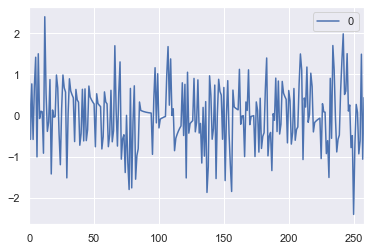

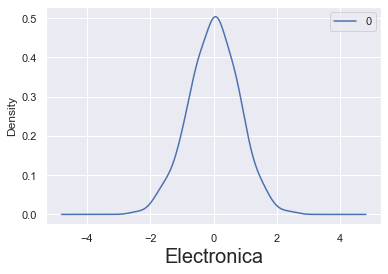

                0
count  259.000000
mean     0.008461
std      0.520044
min     -2.005202
25%     -0.189650
50%     -0.083973
75%      0.177934
max      3.667839


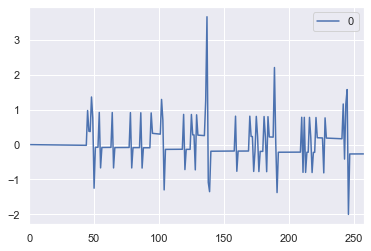

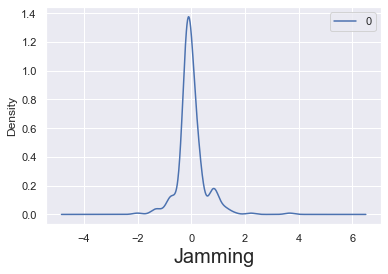

                0
count  260.000000
mean    -0.008632
std      8.820422
min    -43.135502
25%     -2.460051
50%     -1.807578
75%     -0.555248
max     68.255194


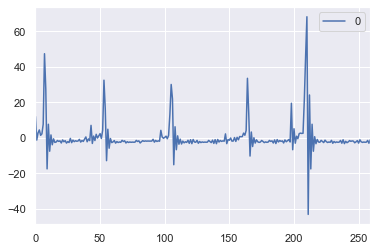

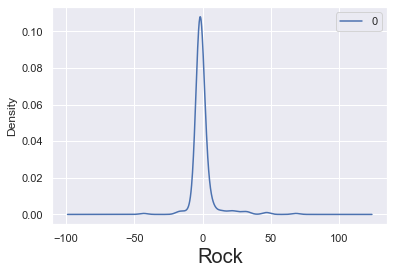

                0
count  260.000000
mean     0.005133
std      6.434260
min    -12.103929
25%     -2.211414
50%     -1.271477
75%     -0.118893
max     45.485526


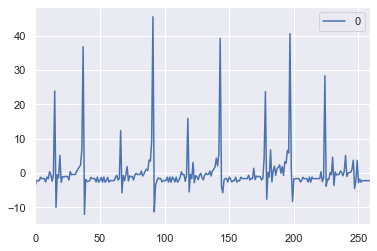

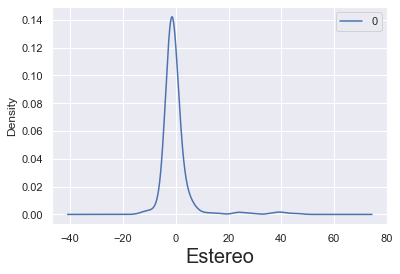

In [32]:
for m in modelos_b: 
    residuals = pd.DataFrame(m[1].resid)
    print(residuals.describe())
    residuals.plot()
    plt.show()
    residuals.plot(kind='kde')
    plt.xlabel(m[0], fontsize=20);
    plt.show()
    
    

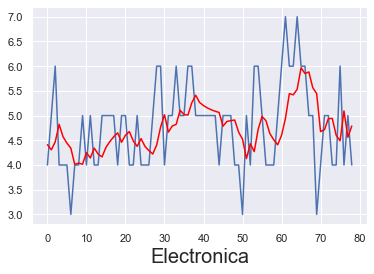

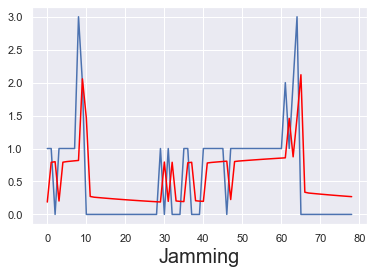

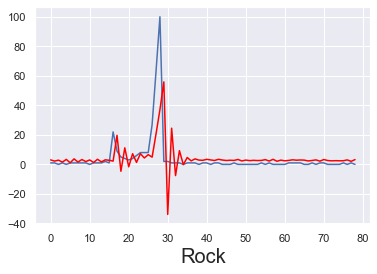

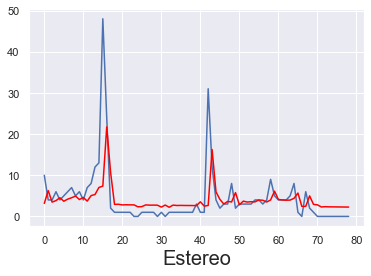

In [35]:
for m in modelos_b:
    plt.plot(m[2])
    plt.plot(m[3], color='red')
    plt.xlabel(m[0], fontsize=20);
    plt.show()